# James Scratchpad

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting level 3 data
df = pd.read_excel('QCEW-TX-L3.xlsx')

In [3]:
df.head() # check_yo_head

,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering
0,2017,1,Texas,Private,111,Crop Production,3,3890,3854,20600,583,156175214,19991,20512,21297,10
1,2017,1,Texas,Total All,111,Crop Production,3,3891,3855,20601,583,156178957,19992,20513,21298,10
2,2017,2,Texas,Private,111,Crop Production,3,3875,3838,21119,608,166979209,21336,20999,21023,10
3,2017,2,Texas,Total All,111,Crop Production,3,3876,3839,21120,608,166985117,21337,21000,21024,10
4,2017,3,Texas,Private,111,Crop Production,3,3880,3843,20772,606,163700955,20981,20753,20582,10


In [4]:
# add a column for total employment for that row
df['Total Employment'] = df['Month 1 Employment'] + df['Month 2 Employment'] + df['Month 3 Employment']

# figure out a way to convert the year and period columns into a single datetime format for plotting
# Convert the period number into the number of the first month for each quarter
# Q1 - 1, Q2 - 4, Q3 - 7, Q4 - 10
df['First Month'] = df.Period.apply(lambda x: '1' if x == 1 else '4' if x == 2 else '7' if x == 3 else '10')

# add first month to year as strings 
df['Quarter'] = df.Year.astype('string') + '-' + df['First Month']

# make a new column that is datetime for first day of each quarter for x axis when plotting
df['Date'] = pd.to_datetime(df.Quarter)


In [5]:
df.head() # check_yo_head

,Year,Period,Area,Ownership,Industry Code,Industry,Level,Establishments,Firms,Average Employment,Average Weekly Wage,Total Wages,Month 1 Employment,Month 2 Employment,Month 3 Employment,Hierarchical Ordering,Total Employment,First Month,Quarter,Date
0,2017,1,Texas,Private,111,Crop Production,3,3890,3854,20600,583,156175214,19991,20512,21297,10,61800,1,2017-1,2017-01-01
1,2017,1,Texas,Total All,111,Crop Production,3,3891,3855,20601,583,156178957,19992,20513,21298,10,61803,1,2017-1,2017-01-01
2,2017,2,Texas,Private,111,Crop Production,3,3875,3838,21119,608,166979209,21336,20999,21023,10,63358,4,2017-4,2017-04-01
3,2017,2,Texas,Total All,111,Crop Production,3,3876,3839,21120,608,166985117,21337,21000,21024,10,63361,4,2017-4,2017-04-01
4,2017,3,Texas,Private,111,Crop Production,3,3880,3843,20772,606,163700955,20981,20753,20582,10,62316,7,2017-7,2017-07-01


In [6]:
# only total
df = df[df.Ownership == 'Total All']
# I only want to keep a few columns
df = df[['Year', 'Period', 'Industry Code', 'Industry', 'Month 1 Employment', 'Month 2 Employment', 'Month 3 Employment']]

In [7]:
df.head() # check_yo_head

,Year,Period,Industry Code,Industry,Month 1 Employment,Month 2 Employment,Month 3 Employment
1,2017,1,111,Crop Production,19992,20513,21298
3,2017,2,111,Crop Production,21337,21000,21024
5,2017,3,111,Crop Production,20982,20754,20583
7,2017,4,111,Crop Production,21747,22210,21254
9,2018,1,111,Crop Production,19531,20177,20942


In [8]:
# I want to take values for columns 'Month 1 Employment', 'Month 2 Employment', 'Month 3 Employment' and pivot them into rows while changing dates to year-month-01 for each month
df = df.melt(id_vars=['Year', 'Period', 'Industry Code', 'Industry'], var_name='Month', value_name='Total Employment')

In [9]:
df.head() # check_yo_head

,Year,Period,Industry Code,Industry,Month,Total Employment
0,2017,1,111,Crop Production,Month 1 Employment,19992
1,2017,2,111,Crop Production,Month 1 Employment,21337
2,2017,3,111,Crop Production,Month 1 Employment,20982
3,2017,4,111,Crop Production,Month 1 Employment,21747
4,2018,1,111,Crop Production,Month 1 Employment,19531


In [10]:
df[(df.Year == 2017) & (df.Industry == 'Crop Production')]

,Year,Period,Industry Code,Industry,Month,Total Employment
0,2017,1,111,Crop Production,Month 1 Employment,19992
1,2017,2,111,Crop Production,Month 1 Employment,21337
2,2017,3,111,Crop Production,Month 1 Employment,20982
3,2017,4,111,Crop Production,Month 1 Employment,21747
1735,2017,1,111,Crop Production,Month 2 Employment,20513
1736,2017,2,111,Crop Production,Month 2 Employment,21000
1737,2017,3,111,Crop Production,Month 2 Employment,20754
1738,2017,4,111,Crop Production,Month 2 Employment,22210
3470,2017,1,111,Crop Production,Month 3 Employment,21298
3471,2017,2,111,Crop Production,Month 3 Employment,21024


In [11]:
# use string method to pull out numbers from Month column
df['Month'] = df.Month.apply(lambda x: [int(s) for s in x.split() if s.isdigit()][0])

In [12]:
# create a function that takes each row and creates a date column for the observation
def extract_date(df):
    if (df[1] == 1) & (df[4] == 1): # first quarter, first month
        return str(df[0]) + '-' + '01' # January
    elif (df[1] == 1) & (df[4] == 2):
        return str(df[0]) + '-' + '02'
    elif (df[1] == 1) & (df[4] == 3):
        return str(df[0]) + '-' + '03'
    elif (df[1] == 2) & (df[4] == 1):
        return str(df[0]) + '-' + '04'
    elif (df[1] == 2) & (df[4] == 2):
        return str(df[0]) + '-' + '05'
    elif (df[1] == 2) & (df[4] == 3):
        return str(df[0]) + '-' + '06'
    elif (df[1] == 3) & (df[4] == 1):
        return str(df[0]) + '-' + '07'
    elif (df[1] == 3) & (df[4] == 2):
        return str(df[0]) + '-' + '08'
    elif (df[1] == 3) & (df[4] == 3):
        return str(df[0]) + '-' + '09'
    elif (df[1] == 4) & (df[4] == 1):
        return str(df[0]) + '-' + '10'
    elif (df[1] == 4) & (df[4] == 2):
        return str(df[0]) + '-' + '11'
    elif (df[1] == 4) & (df[4] == 3):
        return str(df[0]) + '-' + '12'

In [13]:
df['Date'] = df.apply(extract_date, axis=1)

In [14]:
df.Date = pd.to_datetime(df.Date)

In [15]:
df.head() #check_yo_head

,Year,Period,Industry Code,Industry,Month,Total Employment,Date
0,2017,1,111,Crop Production,1,19992,2017-01-01
1,2017,2,111,Crop Production,1,21337,2017-04-01
2,2017,3,111,Crop Production,1,20982,2017-07-01
3,2017,4,111,Crop Production,1,21747,2017-10-01
4,2018,1,111,Crop Production,1,19531,2018-01-01


In [16]:
df.Industry.nunique()

97

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              5205 non-null   int64         
 1   Period            5205 non-null   int64         
 2   Industry Code     5205 non-null   int64         
 3   Industry          5205 non-null   object        
 4   Month             5205 non-null   int64         
 5   Total Employment  5205 non-null   int64         
 6   Date              5205 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 284.8+ KB


In [18]:
df.Industry.head()

0    Crop Production
1    Crop Production
2    Crop Production
3    Crop Production
4    Crop Production
Name: Industry, dtype: object

In [19]:
# create a dictionary with all dfs for each industry for year 2020
ind_list = df.Industry.value_counts().index.tolist()
ind_list[-1]

'Monetary Authorities-Central Bank'

In [20]:
ind_list.pop(-1)

'Monetary Authorities-Central Bank'

In [21]:
len(ind_list)

96

In [22]:
industry_df_dict = {}
for ind in ind_list:
    industry_df_dict[ind] = df[df.Industry == ind][['Date', 'Total Employment']].set_index('Date')['Total Employment'].sort_index()['2020']

In [23]:
# write a function that takes in a series and returns a dictionary with all the characteristic values with associated keys (column names)
def characterize_series(series):
    pcnt_decrease = ((s['2020-03'][0] - s['2020-04'][0]) / s['2020-03'][0]) * 100
    recovery_slope = (s['2020-06'][0] - s['2020-04'][0]) / 2 # need to normalize this?
    mean = s.mean()
    std = s.std()
    rec_slope_norm = recovery_slope / mean
    cov = mean / std
    characteristic_dict = {
        'pcnt_decrease' : pcnt_decrease,
        'recovery_slope' : recovery_slope,
        'mean' : mean,
        'standard_dev' : std,
        'recovery_slope_normalized' : rec_slope_norm,
        'cov' : cov
    }
    return characteristic_dict

In [24]:
# create an empty characteristics list (list of dictionaries to convert to df)
characteristics = []

In [25]:
# Use dictionary comprehension that runs through each entry in industry_df_dict and appends dictionary to char list (or for loop)
for ind in ind_list:
    s = industry_df_dict[ind]
    characteristics.append(characterize_series(s))

In [26]:
# convert characteristics list into df
char_df = pd.DataFrame(characteristics, index=ind_list)
char_df.sort_values(by='recovery_slope', ascending=False).head(10)

,pcnt_decrease,recovery_slope,mean,standard_dev,recovery_slope_normalized,cov
Food Services and Drinking Places,35.153593,115628.5,967051.333333,112858.674168,0.119568,8.568693
Ambulatory Health Care Services,10.652583,28298.5,759623.083333,25355.354595,0.037253,29.959079
"Amusement, Gambling, and Recreation Industries",53.675816,21461.0,88296.666667,16900.121013,0.243056,5.224617
Clothing and Clothing Accessories Stores,61.838901,20903.5,94593.750000,22972.835817,0.220982,4.117635
Personal and Laundry Services,44.098161,17764.5,104200.333333,15002.558590,0.170484,6.945504
Administrative and Support Services,12.162763,13265.5,753337.916667,37724.281157,0.017609,19.969576
General Merchandise Stores,6.061442,7813.0,275678.666667,11848.367278,0.028341,23.267228
Specialty Trade Contractors,6.026689,5548.0,418456.250000,8067.965860,0.013258,51.866388
Accommodation,41.579068,5248.0,97462.250000,20413.273125,0.053846,4.774455
Warehousing and Storage,-5.055032,5156.0,122100.500000,15390.172753,0.042228,7.933667


In [27]:
char_df.shape

(96, 6)

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
# need to scale data first
def scale(df, scaler):
    '''
    Takes in df and scaler of your choosing and returns df with encoded columns
    '''
    cols = df.columns.tolist()
    new_column_names = [c + '_scaled' for c in cols]
    
    # Fit the scaler on the train
    scaler.fit(df)
    
    # transform train validate and test
    df = pd.concat([
        df,
        pd.DataFrame(scaler.transform(df), columns=new_column_names, index=df.index),
    ], axis=1)
    
    # drop scaled columns
    df = df.drop(columns=cols)
    
    return df

In [32]:
scaled_char_df = scale(char_df, MinMaxScaler())

In [33]:

scaled_char_df

,pcnt_decrease_scaled,recovery_slope_scaled,mean_scaled,standard_dev_scaled,recovery_slope_normalized_scaled,cov_scaled
Support Activities for Agriculture and Forestry,0.137167,0.204608,0.008852,0.005769,0.416648,0.043782
Utilities,0.111261,0.203525,0.069951,0.003820,0.332138,0.609945
Furniture and Home Furnishings Stores,0.460794,0.218773,0.029912,0.030108,0.512069,0.025401
Clothing and Clothing Accessories Stores,1.000000,0.346433,0.079224,0.203521,0.938770,0.004781
Wood Product Manufacturing,0.144387,0.202297,0.020618,0.003523,0.327257,0.189335
...,...,...,...,...,...,...
"Merchant Wholesalers, Durable Goods",0.153342,0.190043,0.304122,0.073755,0.312321,0.132108
Publishing Industries (except Internet),0.152495,0.202842,0.033298,0.005273,0.332208,0.205609
Paper Manufacturing,0.111388,0.201597,0.014699,0.001695,0.311848,0.281296
Miscellaneous Store Retailers,0.517133,0.233425,0.048782,0.052691,0.541176,0.023088


In [38]:
# scaled_char_df.to_excel(r'job-market-analysis\scaled_char_df.xlsx', index = False)

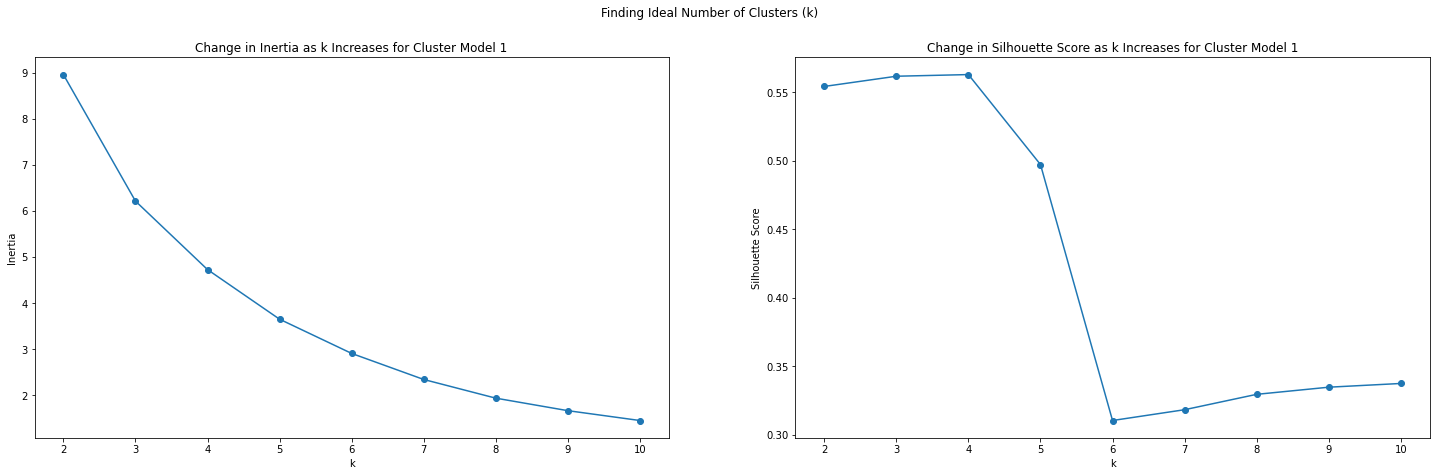

In [42]:
plt.figure(figsize=(25, 7)).suptitle('Finding Ideal Number of Clusters (k)')

kmax = 10

plt.subplot(121)

# let's plot inertia vs k for this model to chose number of clusters (k)

pd.Series({k: KMeans(k).fit(scaled_char_df).inertia_ for k in range(2, kmax+1)}).plot(marker='o')
plt.xticks(range(2, kmax+1))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Change in Inertia as k Increases for Cluster Model 1')


plt.subplot(122)

pd.Series({k: silhouette_score(scaled_char_df, KMeans(k).fit(scaled_char_df).labels_) for k in range(2, kmax+1)}).plot(marker='o')
plt.xticks(range(2, kmax+1))
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Change in Silhouette Score as k Increases for Cluster Model 1');

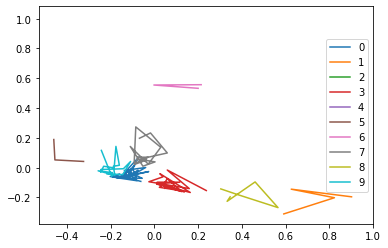

In [52]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = scaled_char_df
pca = PCA(6)
 
#Transform the data
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.plot(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [53]:
scaled_char_df.describe()

,pcnt_decrease_scaled,recovery_slope_scaled,mean_scaled,standard_dev_scaled,recovery_slope_normalized_scaled,cov_scaled
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.246226,0.219550,0.104601,0.054656,0.382751,0.133923
std,0.202621,0.090361,0.174066,0.121688,0.134139,0.164476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.122283,0.201500,0.016956,0.005032,0.317133,0.041182
50%,0.167286,0.203466,0.047584,0.016622,0.345783,0.077577
75%,0.292730,0.212295,0.101202,0.053027,0.405292,0.175271
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# list of variables I will cluster on. 
cluster_vars = ['pcnt_decrease_scaled', 'recovery_slope_scaled', 'mean_scaled', 'standard_dev_scaled', 'recovery_slope_normalized_scaled', 'cov_scaled']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [58]:
def find_k(scaled_char_df, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(scaled_char_df[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

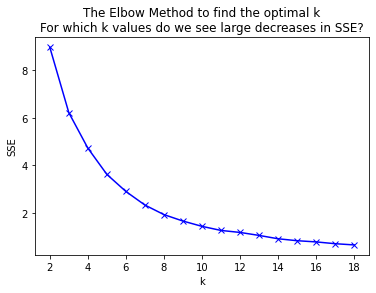

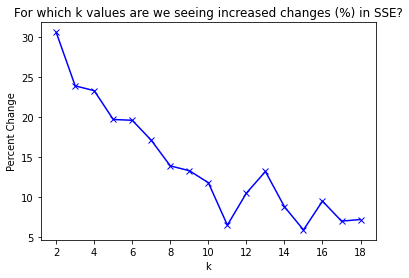

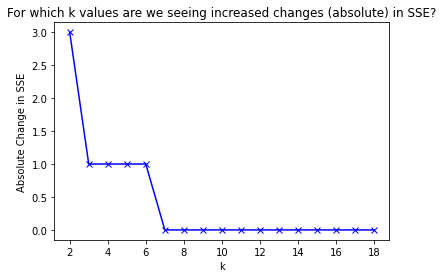

,k,sse,delta,pct_delta
0,2,8.956410,3.0,30.6
1,3,6.213941,1.0,23.9
2,4,4.728741,1.0,23.3
3,5,3.627203,1.0,19.7
4,6,2.911180,1.0,19.6
5,7,2.341363,0.0,17.1
6,8,1.941412,0.0,13.9
7,9,1.670928,0.0,13.3
8,10,1.449107,0.0,11.8
9,11,1.277447,0.0,6.5


In [59]:
find_k(scaled_char_df, cluster_vars, k_range)

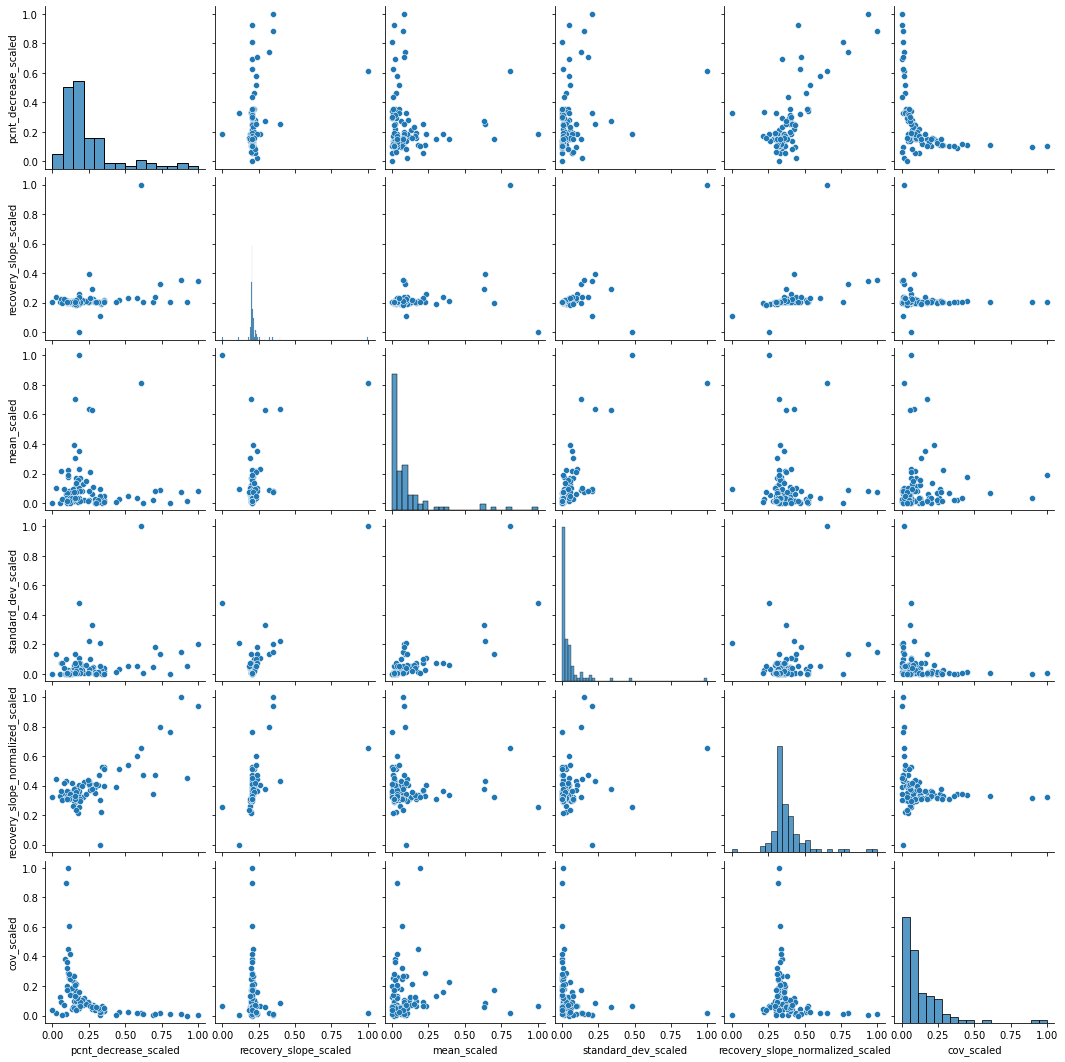

In [70]:
import seaborn as sns

sns.pairplot(data=scaled_char_df)